In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

## 1.Himmelblau定义
Himmelblau函数是用来测试优化算法的常用样例函数之一，表达式：<br>
$f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$

TensorFlow实现：

In [2]:
def himmelblau(x):
    # himmelblau函数实现，传入参数x为2个元素的List
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

## 2.Himmelblau函数可视化

x,y range: (240,) (240,)
X,Y maps: (240, 240) (240, 240)


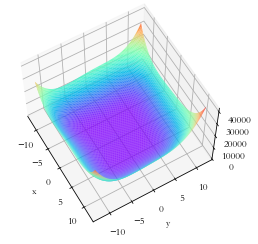

In [3]:
# 可视化坐标的范围
x=np.arange(-12,12,.1)
y=np.arange(-12,12,.1)
print('x,y range:',x.shape,y.shape)

# 生成x-y平面采样网格点，方便可视化
X,Y=np.meshgrid(x,y)
print('X,Y maps:',X.shape,Y.shape)

# 计算网格点上的函数值
Z=himmelblau([X,Y])

# 绘制曲面
from matplotlib import cm
fig=plt.figure('himmelblau')
ax=fig.gca(projection='3d') # 设置3D坐标轴
ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap=plt.cm.rainbow) # 3D曲面图
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

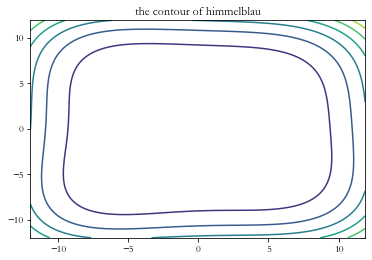

In [4]:
fig=plt.figure('contour')
ax=fig.gca()
# 画等高线
ax.contour(X,Y,Z)
plt.title('the contour of himmelblau')
plt.show()

由图可见，Himmelblau函数有4个局部极小值点，并且全部局部极小值为0，通过解析方法计算其坐标得：<br>
$(3,2)\qquad(-2.805,3.131)\qquad(-3.779,-3.283)\qquad(3.584,-1.848)$

## 3.梯度下降计算Himmelblau函数的极小值

In [5]:
# 参数初始值对优化有影响
init_val=[[4.,0.],[1.,0.],[-4.,0.],[-2.,2.]]
for i in range(4):
    x=tf.constant(init_val[i])
    for step in range(200): # 循环优化200次
        with tf.GradientTape() as tape: # 梯度跟踪
            tape.watch([x]) # 加入梯度跟踪列表
            y=himmelblau(x) # 前向传播
        # 反向传播
        grads=tape.gradient(y,[x])[0]

        # 更新参数
        x-=0.01*grads
        # 打印优化的极小值
        # if step%20==19:
        #     print(f'step[{step}]: x={x.numpy()}, f(x)={y.numpy()}')

    print(f'initial value: {init_val[i]} final result: x={x.numpy()}, f(x)={y.numpy()}')

initial value: [4.0, 0.0] final result: x=[ 3.584428  -1.8481264], f(x)=1.1368684856363775e-12
initial value: [1.0, 0.0] final result: x=[3.0000002 1.9999996], f(x)=1.818989620386291e-12
initial value: [-4.0, 0.0] final result: x=[-3.7793102 -3.283186 ], f(x)=0.0
initial value: [-2.0, 2.0] final result: x=[-2.805118   3.1313126], f(x)=2.273736618907049e-13


由上可见不同初始值对求解结果有所影响：

![](https://github.com/zfhxi/Learn_tensorflow/blob/master/ch07-%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95/img/18.png?raw=true)

In [ ]:
import os
pid=os.getpid()
!kill -9 $pid